In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST) # aqui están todos
path

Path('/storage/data/mnist_png')

In [ ]:
# im = Image.open(ejemplo)
# im

In [ ]:
# array(im).shape

Los numeros con los que entrena estan en blanco sobre negro! por eso las imagenes que he probado con el modelo salen todas mal, porque estan en normal, letra negra en fondo blanco.

Si sigue fallando tras arreglar eso convendría reducir la resolucion de la imagen entrante en 28x28, pero sospecho que eso ya lo hará el programa automáticamente.

In [ ]:
numbers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter = GrandparentSplitter(train_name="training", valid_name="testing"), 
    get_y=parent_label, 
    item_tfms=Resize(224)) # puede que sea necesario para que funcione.

dls = numbers.dataloaders(path)

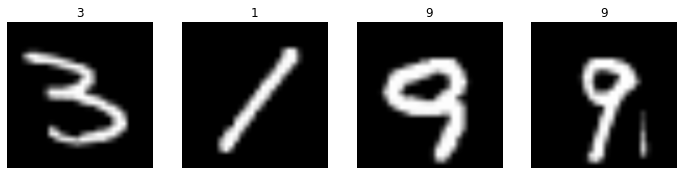

In [ ]:
dls.train.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, pretrained=True, # solo he cambiado esto
                    loss_func=None, metrics=accuracy) # poner el otro loss function lo jodía todo...
# lo explican en el tema 5, al no especificar usa fastai busca la loss function que mejor podría venir, 
# en este caso cross entropy loss. Con eso ya puede hacer su magia


# para hacer la transferencia de modelos preentrenados se usa el fine_tune (transfer learning)
learn.fine_tune(1,0.1) # 0.1 para ajustar y que tarde menos (unos 10 minutos)

epoch,train_loss,valid_loss,accuracy,time
0,2.039666,1.600961,0.965700,04:59


epoch,train_loss,valid_loss,accuracy,time
0,0.089703,0.038382,0.992900,07:00


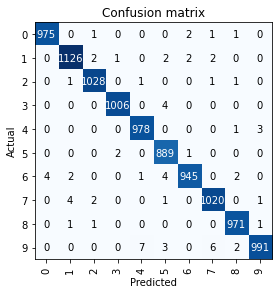

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

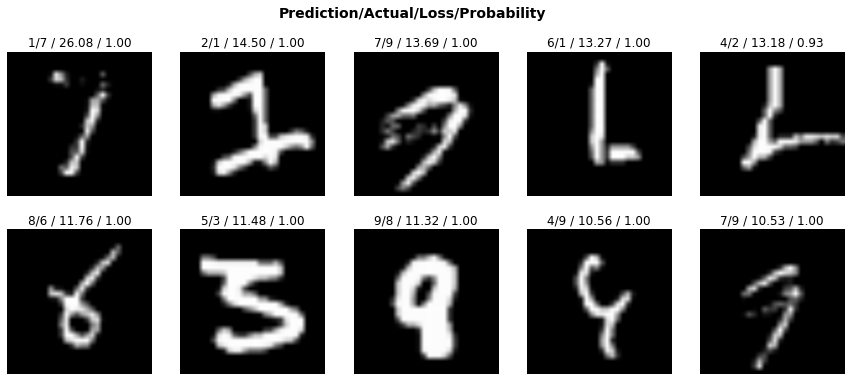

In [ ]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
#learn.export(fname = "numeros.pkl")

# Con data augmentation

El data augmentation aqui puede que la este liando, como minimo el flip lo quito, pero por si acaso voy a comparar con y sin data augmentation a ver con que consigo mejor precision

In [ ]:
numbers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    # separo por carpetas, si sus nombres no son y valid, hay que especificarlos, si no da error.
    splitter = GrandparentSplitter(train_name="training", valid_name="testing"), 
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(do_flip=False))

dls = numbers.dataloaders(path)

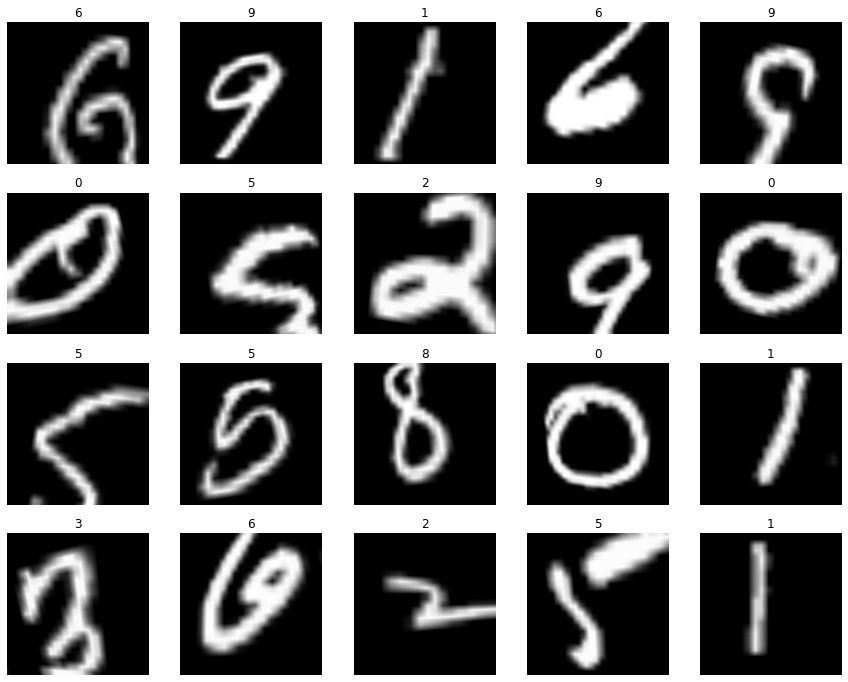

In [ ]:
dls.train.show_batch(max_n=20, nrows=4)

In [ ]:
learn = cnn_learner(dls, resnet18, pretrained=True, # solo he cambiado esto
                    metrics=accuracy)

learn.fine_tune(1,0.1) # 0.1 para ajustar y que tarde menos (unos 15 minutos)

epoch,train_loss,valid_loss,accuracy,time
0,2.080129,0.790158,0.965600,05:25


epoch,train_loss,valid_loss,accuracy,time
0,0.107938,0.026033,0.991700,07:28


In [ ]:
#learn.export(fname = "numeros augmented.pkl")

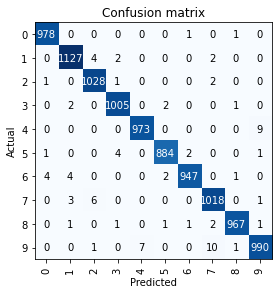

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

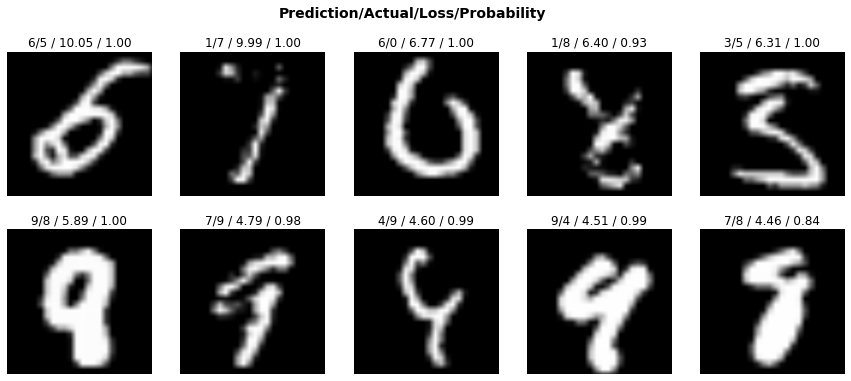

In [ ]:
interp.plot_top_losses(10, nrows=2)

Funciona muy parecido, no me convence demasiado hacer data augmentation